In [17]:
%load_ext autoreload
%autoreload 2
from text3d2video.artifacts.animation_artifact import AnimationArtifact
import text3d2video.wandb_util as wandb_util

animation_tag = "rumba:latest"

animation = AnimationArtifact.from_wandb_artifact_tag("rumba:latest", download=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


wandb: Downloading large artifact rumba:latest, 144.70MB. 73 files... 
wandb:   73 of 73 files downloaded.  
Done. 0:0:0.5


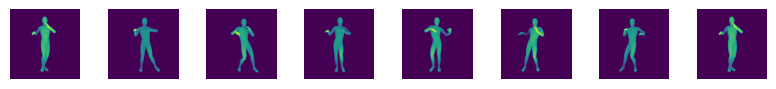

In [20]:
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map
from text3d2video.util import front_camera

frames = animation.load_frames(animation.frame_nums(8))
camera = front_camera()
depth_maps = render_depth_map(frames, camera)

display_ims(depth_maps)